# Final Task Kalbe Nutritionals

## Data Understanding

### Import & Merge Data

In [2]:
import pandas as pd
import numpy as np 
pd.options.display.max_columns = None

df_customer = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Customer.csv', sep=';')
df_product = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Product.csv', sep=';')
df_store = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Store.csv', sep=';')
df_transaction = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Transaction.csv', sep=';')

In [3]:
# Melakukan operasi join antara tabel-tabel
df = pd.merge(df_transaction, df_product, on='ProductID')
df = pd.merge(df, df_store, on='StoreID')
df = pd.merge(df, df_customer, on='CustomerID')

## Exploratory Data Analysis (EDA)

In [4]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",36,0,Married,"10,53"
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Product Name    5020 non-null   object
 9   Price_y         5020 non-null   int64 
 10  StoreName       5020 non-null   object
 11  GroupStore      5020 non-null   object
 12  Type            5020 non-null   object
 13  Latitude        5020 non-null   object
 14  Longitude       5020 non-null   object
 15  Age             5020 non-null   int64 
 16  Gender          5020 non-null   int64 
 17  Marital Status  4976 non-null   object
 18  Income  

In [6]:
# df[df['Price_x'].values == df['Price_y'].values]
df.drop(columns=['Price_y'], inplace=True)
df.rename(columns={'Price_x' : 'Price'}, inplace=True)

In [7]:
df[df.duplicated()]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income


In [8]:
for i in df.columns :
    print(f"~ ~ ~ {i} || Type : {df[i].dtypes} ~ ~ ~")
    print(f"{df[i].unique().tolist()[:5]} \n")

~ ~ ~ TransactionID || Type : object ~ ~ ~
['TR11369', 'TR56601', 'TR89012', 'TR67395', 'TR45738'] 

~ ~ ~ CustomerID || Type : int64 ~ ~ ~
[328, 117, 335, 181, 154] 

~ ~ ~ Date || Type : object ~ ~ ~
['01/01/2022', '24/12/2022', '25/03/2022', '22/01/2022', '29/12/2022'] 

~ ~ ~ ProductID || Type : object ~ ~ ~
['P3', 'P9', 'P5', 'P8', 'P2'] 

~ ~ ~ Price || Type : int64 ~ ~ ~
[7500, 10000, 4200, 16000, 3200] 

~ ~ ~ Qty || Type : int64 ~ ~ ~
[4, 1, 5, 3, 6] 

~ ~ ~ TotalAmount || Type : int64 ~ ~ ~
[30000, 10000, 21000, 48000, 9600] 

~ ~ ~ StoreID || Type : int64 ~ ~ ~
[12, 9, 6, 11, 5] 

~ ~ ~ Product Name || Type : object ~ ~ ~
['Crackers', 'Yoghurt', 'Thai Tea', 'Oat', 'Ginger Candy '] 

~ ~ ~ StoreName || Type : object ~ ~ ~
['Prestasi Utama', 'Lingga', 'Sinar Harapan', 'Bonafid', 'Prima Tendean'] 

~ ~ ~ GroupStore || Type : object ~ ~ ~
['Prestasi', 'Lingga', 'Gita', 'Prima', 'Buana'] 

~ ~ ~ Type || Type : object ~ ~ ~
['General Trade', 'Modern Trade'] 

~ ~ ~ Latitude || Typ

In [9]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price              0
Qty                0
TotalAmount        0
StoreID            0
Product Name       0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Age                0
Gender             0
Marital Status    44
Income             0
dtype: int64

In [10]:
df['Latitude'] = df['Latitude'].str.replace(',', '.')
df['Latitude'] = df['Latitude'].astype(float)

df['Longitude'] = df['Longitude'].str.replace(',', '.')
df['Longitude'] = df['Longitude'].astype(float)

df['Income'] = df['Income'].str.replace(',', '.')
df['Income'] = df['Income'].astype(float)

In [11]:
df.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID,Latitude,Longitude,Age,Gender,Income
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841,-2.942236,109.600789,40.003586,0.452988,8.623713
std,129.672955,4600.708780,1.855295,19675.462455,4.028502,4.323225,8.357593,12.834719,0.497835,6.518242
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,-7.797068,95.323753,0.000000,0.000000,0.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,-6.914864,104.756554,30.000000,0.000000,4.220000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,-5.135399,110.370529,39.000000,0.000000,7.720000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,0.533505,114.590111,51.000000,1.000000,10.780000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,5.548290,128.190643,72.000000,1.000000,71.300000


In [12]:
df.nunique()

TransactionID     4908
CustomerID         447
Date               365
ProductID           10
Price               10
Qty                 10
TotalAmount         44
StoreID             14
Product Name        10
StoreName           12
GroupStore           7
Type                 2
Latitude            14
Longitude           14
Age                 54
Gender               2
Marital Status       2
Income             369
dtype: int64

In [13]:
df_status_nan = df[~df['Marital Status'].isin(['Married', 'Single'])]
df_status_nan.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
1002,TR65931,443,19/05/2022,P1,8800,5,44000,12,Choco Bar,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,33,1,NaN,9.28
1003,TR81388,443,30/10/2022,P5,4200,4,16800,10,Thai Tea,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513,33,1,NaN,9.28
1004,TR66239,443,15/02/2022,P5,4200,5,21000,14,Thai Tea,Priangan,Priangan,Modern Trade,-5.450000,105.266670,33,1,NaN,9.28
1005,TR65307,443,15/01/2022,P5,4200,4,16800,4,Thai Tea,Gita Ginara,Gita,General Trade,-6.966667,110.416664,33,1,NaN,9.28
1006,TR13981,443,06/11/2022,P5,4200,2,8400,4,Thai Tea,Gita Ginara,Gita,General Trade,-6.966667,110.416664,33,1,NaN,9.28


In [14]:
print(f"Jumlah Missing Values pada kolom 'Marital Status' : {df_status_nan.shape[0]}")

Jumlah Missing Values pada kolom 'Marital Status' : 44


### Distribusi Data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk plotting boxplot
def plot_box(data, labels, title, figsize=(15, 6)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize) 
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value')
    ax.set_title(title)
    ax.set_yticklabels(labels)

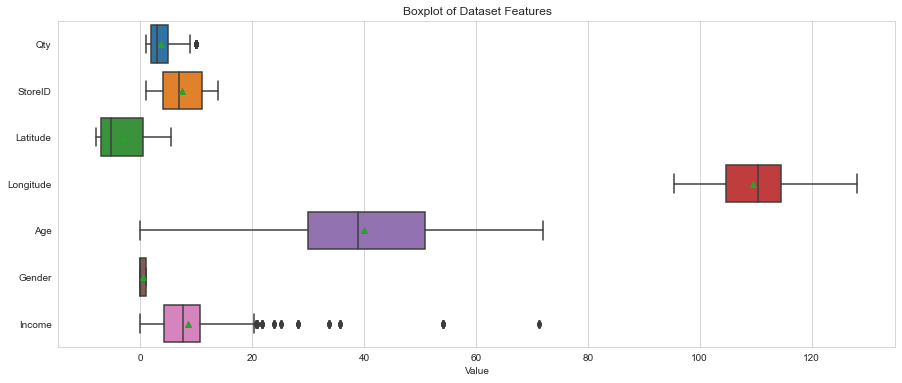

In [16]:
df_col_num = df[['Qty', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income']]
plot_box(data = df_col_num,
         labels = df_col_num.columns.tolist(),
         title='Boxplot of Dataset Features')

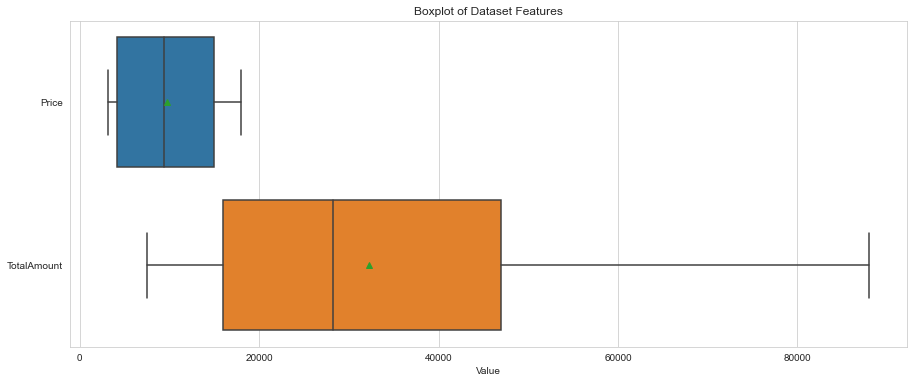

In [17]:
df_col_num = df[['Price', 'TotalAmount']]
plot_box(data = df_col_num,
         labels = df_col_num.columns.tolist(),
         title='Boxplot of Dataset Features')

In [18]:
import matplotlib.pyplot as plt

def plot_string_columns(dataframe, column_names):
    num_cols = len(column_names)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(14, 8))

    for i, col in enumerate(column_names):
        value_counts = dataframe[col].value_counts()
        labels = value_counts.index
        counts = value_counts.values

        # Menggunakan warna langsung pada fungsi color
        bars = axes[i].bar(labels, counts, color='steelblue')

        axes[i].set_title(f"Distribusi Data pada Kolom {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Counts")

        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width() / 2, height, height,
                         ha='center', va='bottom')

        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    plt.show()


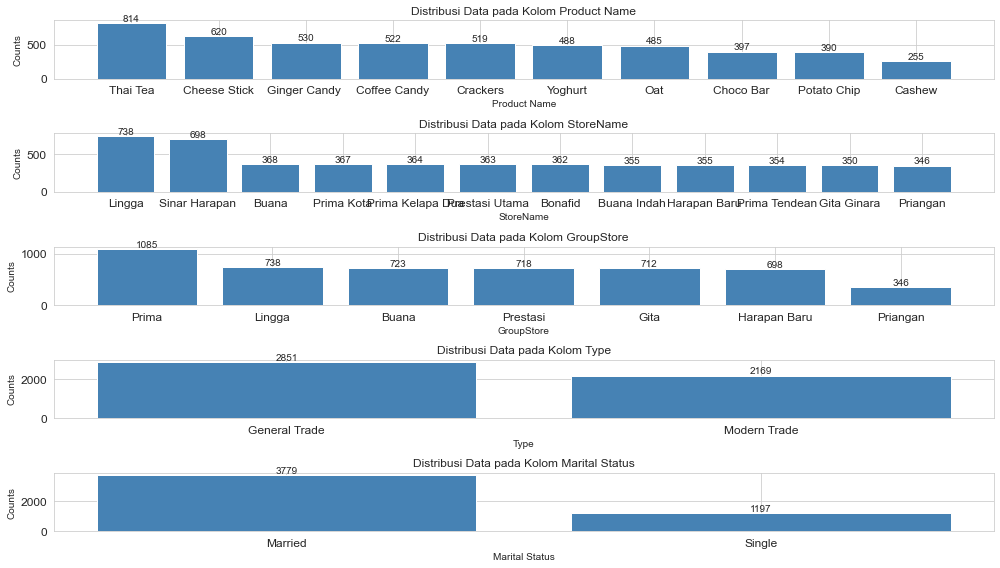

In [19]:
col = ['Product Name', 'StoreName', 'GroupStore', 'Type', 'Marital Status']
plot_string_columns(df, col)

### Heatmap Features Correlation

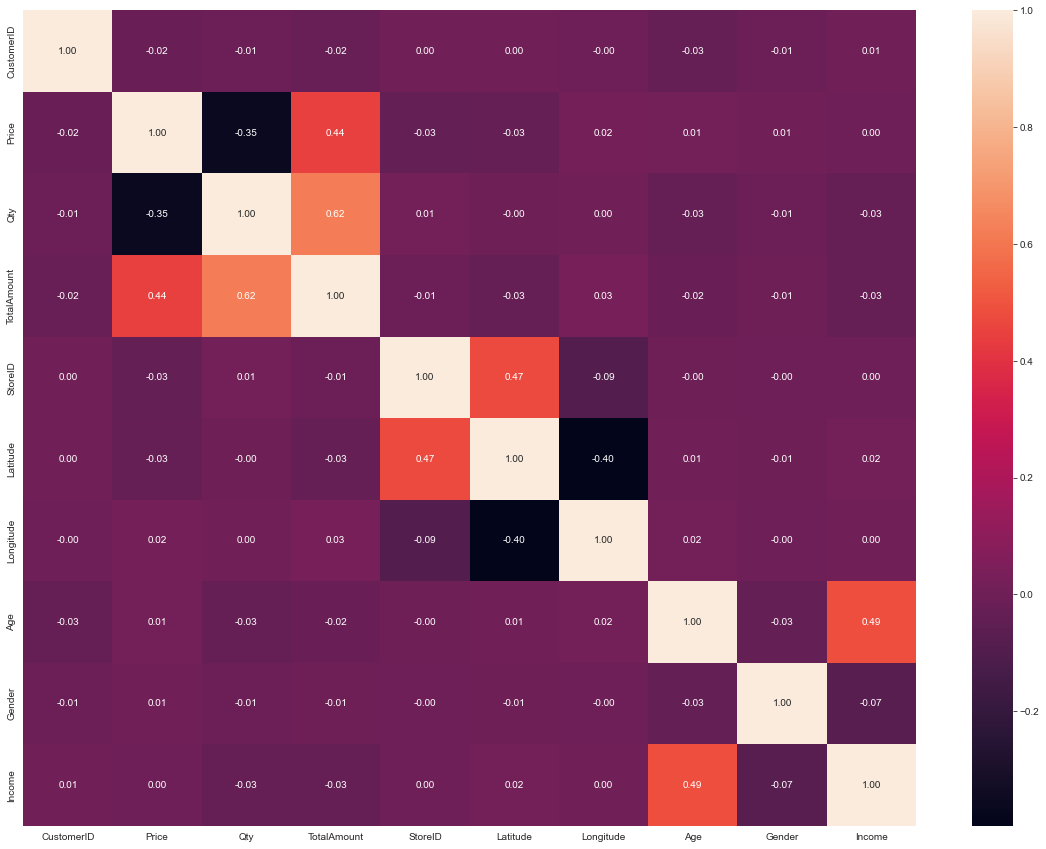

In [20]:
# heatmap correlation
corr = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Checking Multikolinearitas

In [21]:
# MULTIKOLINEARITAS

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
selected_columns = ['Price', 'Qty', 'TotalAmount', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income']
df_selected = df[selected_columns]

X = add_constant(df_selected)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

,feature,VIF
1,Price,6.063522
2,Qty,7.951643
3,TotalAmount,8.637968
4,StoreID,1.304339
5,Latitude,1.533164
6,Longitude,1.202565
7,Age,1.311551
8,Gender,1.005883
9,Income,1.316511


## Machine Learning Regression (Time Series ARIMA)

### Feature Preprocessing

In [22]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,Lingga,Lingga,Modern Trade,-3.654703,128.190643,36,0,Married,10.53
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,Lingga,Lingga,Modern Trade,-5.135399,119.423790,36,0,Married,10.53
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53


In [32]:
# df['Date'] = pd.to_datetime(df['Date'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Product Name    5020 non-null   object        
 9   StoreName       5020 non-null   object        
 10  GroupStore      5020 non-null   object        
 11  Type            5020 non-null   object        
 12  Latitude        5020 non-null   float64       
 13  Longitude       5020 non-null   float64       
 14  Age             5020 non-null   int64         
 15  Gend

In [45]:
df_grouped = df.groupby('Date')['Qty'].sum().reset_index().set_index('Date')
df_grouped.head()

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67


### Train Test Split Data

In [75]:
row_split_data = int(len(df_grouped) * 0.9)

training_data = list(df_grouped[0:row_split_data]['Qty'])
test_data = list(df_grouped[row_split_data:]['Qty'])

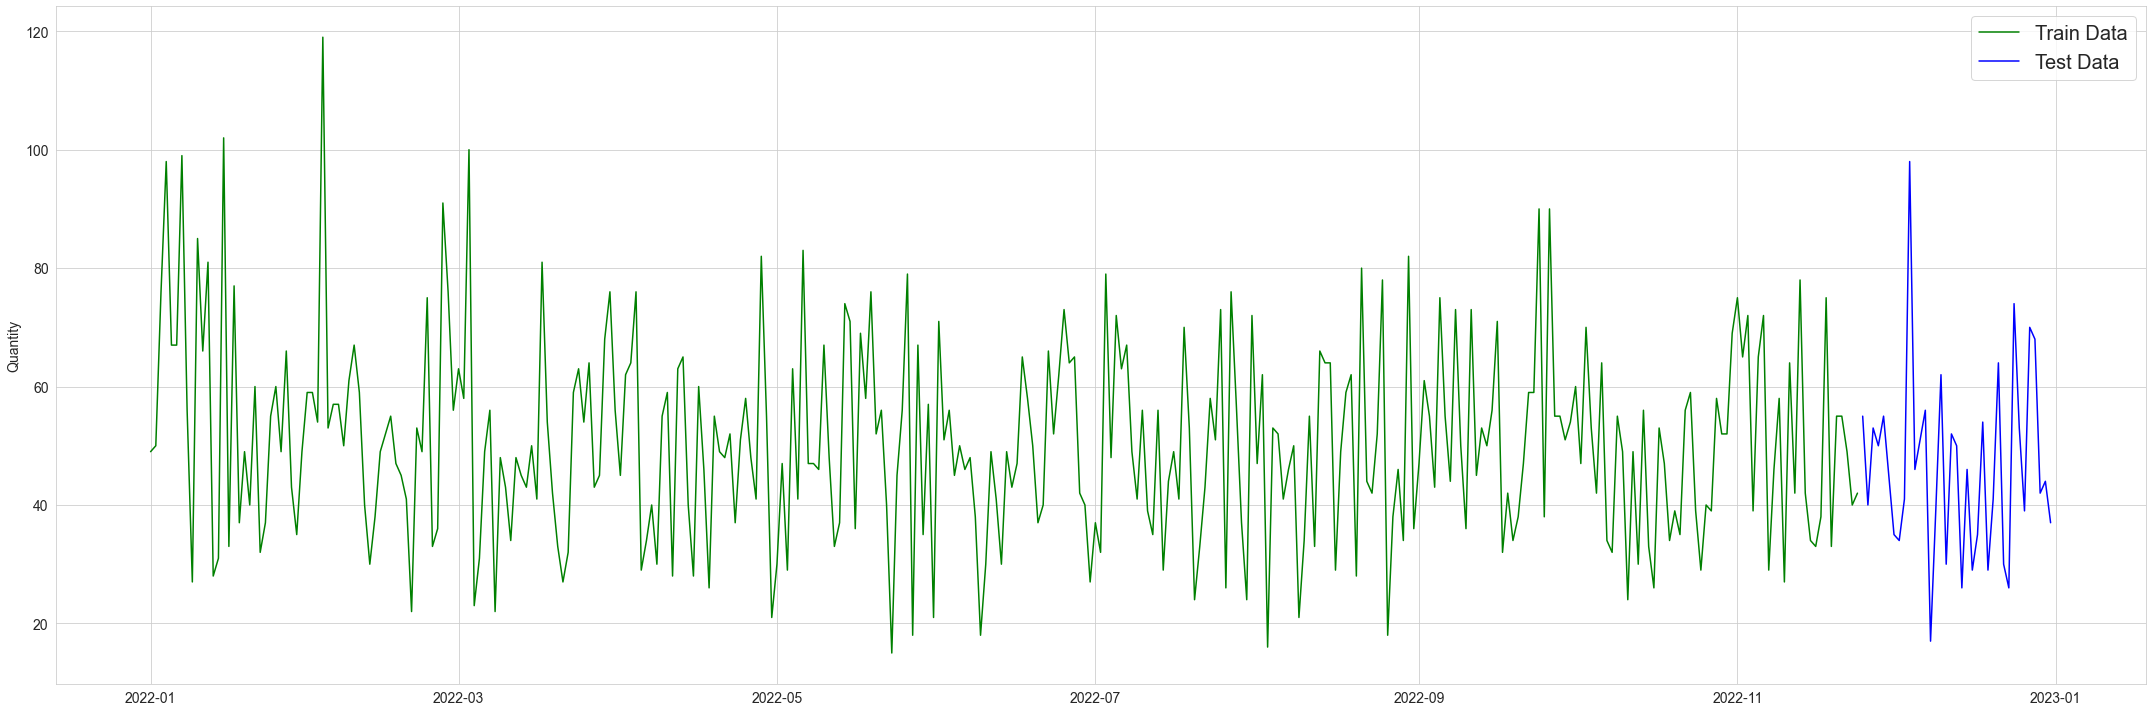

In [89]:
plt.figure(figsize=(30, 10))
plt.ylabel('Quantity', fontsize=14)

plt.plot(df_grouped[0:row_split_data]['Qty'], 'green', label='Train Data')
plt.plot(df_grouped[row_split_data:]['Qty'], 'blue', label='Test Data')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

### Modelling - Time Series ARIMA

In [99]:
from statsmodels.tsa.arima import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

model_pred = []
n_test_data = len(test_data)

for i in range(n_test_data) :
    model = ARIMA(training_data, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output[0])[0]
    model_pred.append(yhat)
    actual_test_value = test_data[i]
    training_data.append(actual_test_value)

ImportError: numpy.core.multiarray failed to import